<a href="https://colab.research.google.com/github/KarlieChadwick/MAT421/blob/Chapter-9/Module_H_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 22 Part 2

Karlie Chadwick

**Chapter 22.4: Numerical Error and Instability**

When performing ODEs there are two main factors to consider: accuracy and stability. Accuracy is how close the approximated solution is to the exact solution. Stability is the ability to keep the error from growing as iterations continue to progress. A growing error would indicate instability in the ODE.

*1) Use Euler explicit, Euler implicit, and trapezoidal formulas to compare stability in a pendulum problem.*

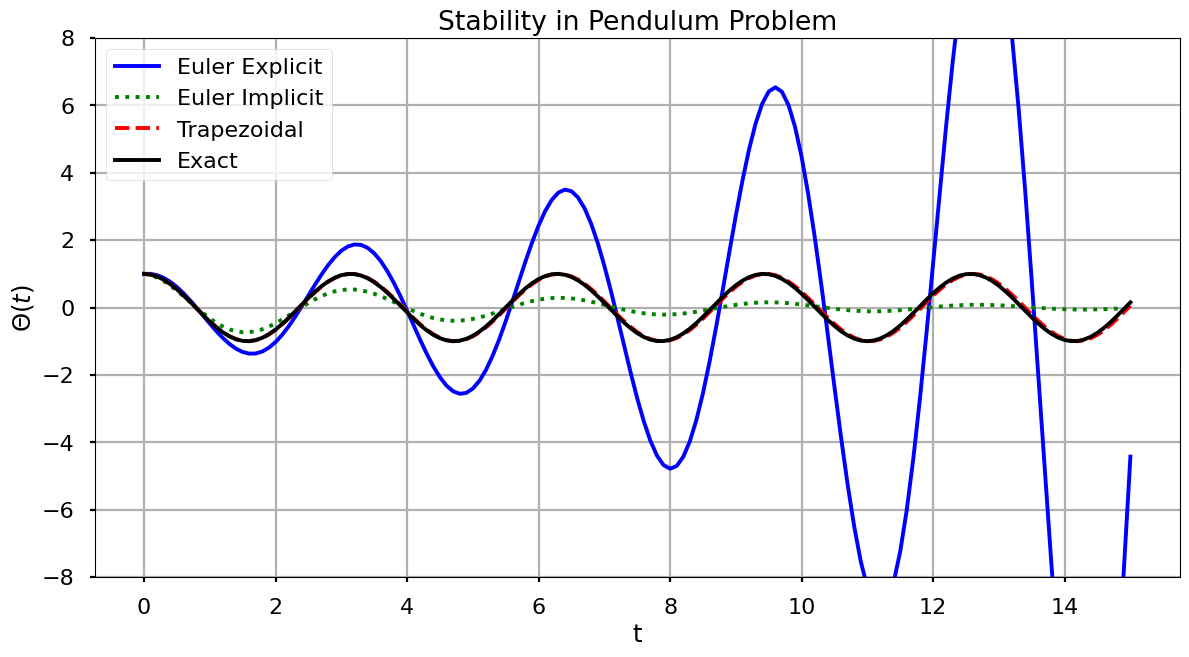

In [20]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# First, step size, numerical grid,
# frequency and defined and equations
# are layed out

h = 0.1
t = np.arange(0, 15.1, h)
w = 2
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# Integrations for each method are performed

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
# The plot is set up and the equations are 
# graphed and labeled for comparision of methods

plt.style.use('seaborn-v0_8-poster')
%matplotlib inline 

plt.figure(figsize = (14, 7))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-8, 8])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Euler Explicit', 'Euler Implicit', \
            'Trapezoidal', 'Exact'])
plt.title('Stability in Pendulum Problem')
plt.grid('light grey')
plt.show()

Based on the graph above, we can determine that the most stable method for the pendulum problem is the trapezoidal method. Along with being most stable, we can also say it is the most accurate method becuase it lines up with the exact solution best. The explicit Euler formula is unstable because as iterations progress the cosine curve gets stretched about the y axis. The implicit Euler formula is also unstable because it decays as t increases.

**Chapter 22.5: Predictor-Corrector and Runge Kutta Methods**

Predictor-Corrector methods are used to improve the accuracy of other methods by selecting serveral data points of a function and correcting them to form a more accurate function overall. The first part, selecting data points, is known as predicting. Any explicit formula can be used to predict.

For example, the midpoint method prediction can be written as; $S(t_j + \frac{h}{2}) = S(t_j) + \frac{h}{2}F(t_j,S(t_j))$

Then, the correction step must be applied. The corrector step with use the predicted point and compute a more accurate data point for an overall more accurate solution. 

Using the same midpoint method, the correction step can be written as; $S(t_{j+1}) = S(t_j) +hF(t_j + \frac{h}{2},S(t_j+\frac{h}{2}))$

Runge Kutta methods are also used in solving ODEs. The accuracy of Euler methods are greatly imporved with the use of these methods. The most commonly used Runge Kutta method is the 4th order method, also known as RK4. This method involves calculating 4 intermediate values of the function then using those values to estimate the function's value at the next time step. RK4 equation can be written as $S(t_{j+1}) = S(t_j) + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$
 - $k_1 = F(t_j,S(t_j))$
 - $k_2 = F(t_j+\frac{h}{2}, S(t_j)+\frac{1}{2}k_1h)$
 - $k_3 = F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h)$
 - $k_4 = F(t_j + h, S(t_j)+k_3h)$

**Chapter 22.6: Python ODE Solvers**

There are built in functions in Python that can sove ODE problems. In ordder to implement these functions scipy.integrate.solve_ivp must be first imported. Once in the system, solve_ivp follows this format: solve_ivp(< the function, F >, < the integral of iteration >, < the inital state of the function >, method = < method of choice (i.e. RK4) >, t_eval = < the times within the interval to store the computed solution >)

The absolute (atol) and relative (rtol) tolerances can also be controlled when programming in python. By default, they are set to 1e-6 and 1e-3 respectively.

*1) Approximate the solution for the ODE dS(t)/dt = sin(t) with an intial value of 0 and an interval between 0 and 2pi using solve_ivp. Plot the answer and relative error over time as well*

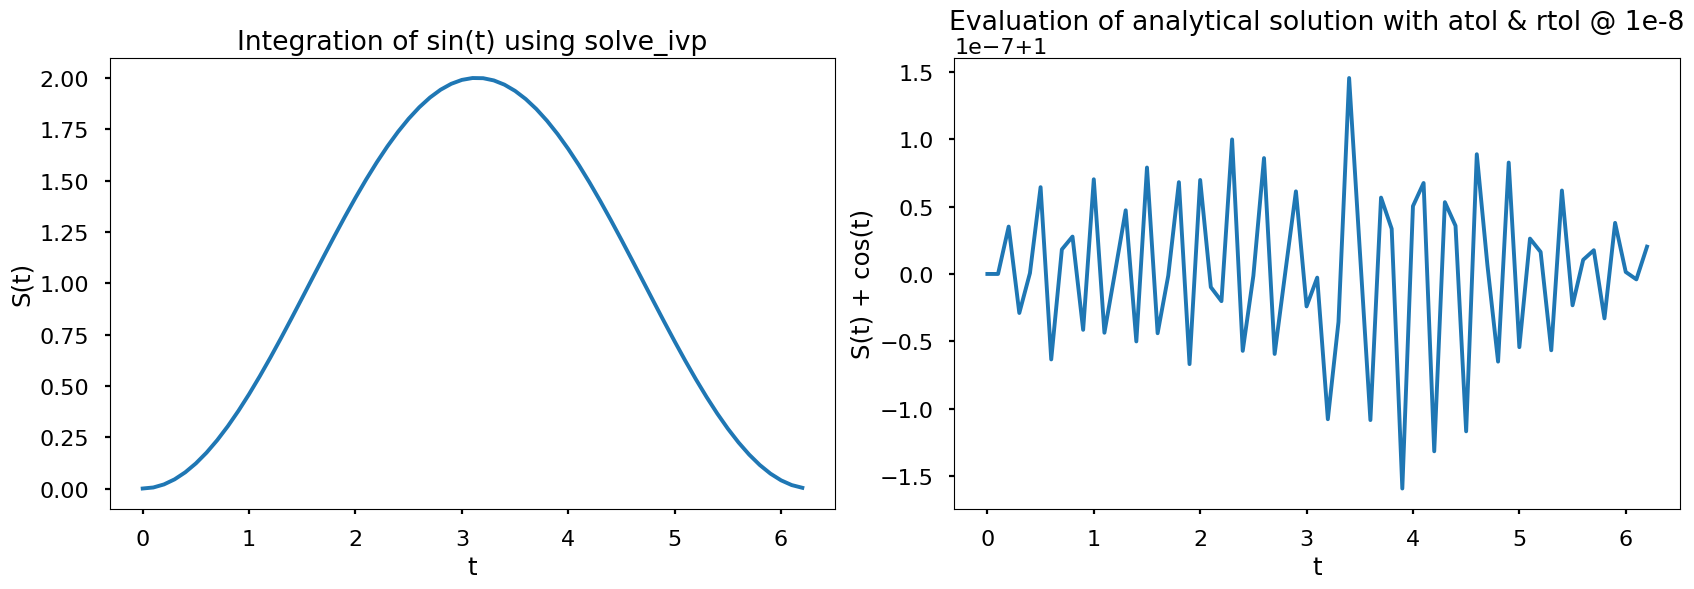

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# First, the function and solve_ivp parameters
# are defined

F = lambda t, s: np.sin(t)

t_eval = np.arange(0, 2*np.pi, 0.1)
sol = solve_ivp(F, [0, 2*np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

# Then, the plot is designed and set up to graph
# the approximate solution as well as the error
# between approximate and exact value over time

plt.style.use('seaborn-v0_8-poster')
%matplotlib inline

plt.figure(figsize = (17, 6))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Integration of sin(t) using solve_ivp')

plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.title('Evaluation of analytical solution with atol & rtol @ 1e-8')

plt.tight_layout()
plt.show()